## testing hyperparams for varied movie length 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from sklearn import preprocessing
import torch
from torch.utils.data import DataLoader
import copy
from torch import nn
%matplotlib inline
import matplotlib.pyplot as plt
from dnaDataloader import expermentDataloader
from dnaDataloader import addData
from dnaModelUtil import printStats
from dnaModelUtil import train
from scipy import stats as st
import os
from datetime import datetime

device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
batch_size = 100
num_workers = 0
device

device(type='cuda', index=3)

In [2]:
folder = '/home/khood/GitHub/SNN-DNA-project/Prepocessing/sorted/1800_nM_AR_5000'

In [3]:
oneMinInFPS = 1200
data = expermentDataloader(
    f"{folder}/index.csv",
    f"{folder}", 
    length = 10*oneMinInFPS
    # length=36000 # 30 min half movie length 
    # length=12000 # 10 min movie length 
)
# rawData = [(d[0][20*oneMinInFPS:], d[1])for d in data]
rawData = [d for d in data]

featIn 12000


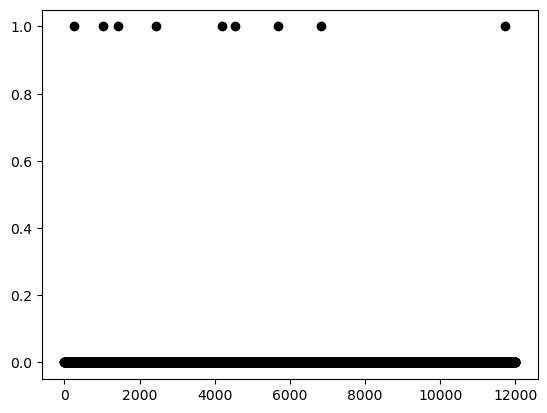

In [4]:
plt.plot(list(range(len(rawData[0][0]))), rawData[0][0], 'o', color='black')
featIn = len(rawData[0][0])
print(f"featIn {featIn}")

In [5]:
len(rawData)

888

In [6]:
featIn = len(rawData[0][0])
trainValidData = []
testData = []
addData(testData, trainValidData, rawData, rhsSize=300)


np.random.shuffle(trainValidData)
trainData = []
validData = []
addData(trainData, validData, trainValidData, rhsSize=int(len(trainValidData)*(1/3)))

trainDataset = DataLoader(trainData, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True) 
validDataset = DataLoader(validData, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
testDataset = DataLoader(testData, batch_size=len(testData), shuffle=True, num_workers=num_workers, pin_memory=True)
print(f"Training dataset size: {len(trainData)}")
print(f"Valid dataset size: {len(validData)}")
print(f"Testing dataset size: {len(testData)}")
print(f"Total: {len(trainData) + len(validData) + len(testData)}")
print(f"number train batches:{len(trainDataset)}")
print(f"number valid batches:{len(validDataset)}")
print(f"number test batches:{len(testDataset)}")

featIn

Training dataset size: 200
Valid dataset size: 100
Testing dataset size: 588
Total: 888
number train batches:2
number valid batches:1
number test batches:1


12000

In [7]:
size = int(featIn*0.06)
size

720

In [8]:
model = nn.Sequential(
        nn.Linear(featIn,size),
        nn.Tanh(),
        nn.Dropout(p=0.2),
        nn.Linear(size,size),
        nn.Tanh(),
        nn.Dropout(p=0.2),
        nn.Linear(size,size),
        nn.Tanh(),
        nn.Linear(size,1),
        ).to(device)
MSE = nn.MSELoss(reduction = 'mean')
adam = torch.optim.Adam(model.parameters(),lr=0.0001,weight_decay=1e-5)

em = 20
epochs = 10000
losses = []
accs = []
print("training...")
for e in range(epochs): 
    avgLossTrain = []
    currentAccTrain = []
    model.train()
    for i, (inputs, targets) in enumerate(trainDataset):
        inputs, targets= inputs.float().to(device), targets.float().to(device)
        outputs = model(inputs)
        loss = MSE(outputs, targets)
        avgLossTrain.append(float(loss.item()))
        adam.zero_grad()
        loss.backward()
        adam.step()
        totalCorrect = torch.sum(torch.isclose(outputs.int(), targets.int(), atol=em))
        totalCorrect = totalCorrect.item()
        currentAccTrain.append(float(totalCorrect/len(targets)))
        
    avgLoss = []
    currentAcc = []
    model.eval()
    for i, (inputs, targets) in enumerate(validDataset):
        inputs, targets= inputs.float().to(device), targets.float().to(device)
        outputs = model(inputs)
        loss = MSE(outputs, targets)
        outputPlot = outputs.clone().detach().cpu().numpy()
        targetsPlot = targets.clone().detach().cpu().numpy()
        avgLoss.append(float(loss.clone().detach().cpu().numpy()))
        totalCorrect = torch.sum(torch.isclose(outputs.int(), targets.int(), atol=em))
        totalCorrect = totalCorrect.clone().detach().cpu().numpy()
        currentAcc.append(float(totalCorrect/len(targets)))
        print(f"\
        epoch: {e}/{epochs}\t \
        Train Loss:{'%.4f' % (np.sum(avgLossTrain)/len(avgLossTrain))} Valid Loss:{'%.4f' % (np.sum(avgLoss)/len(avgLoss))}\t \
        Train accuracy:{'%.2f' % (np.sum(currentAccTrain)/len(currentAccTrain))} Valid accuracy:{'%.2f' % (np.sum(currentAcc)/len(currentAcc))} \
        ",end="\x1b\r")
    accs.append(float(np.sum(currentAcc)/len(currentAcc)))
    losses.append(float(np.sum(avgLoss)/len(avgLoss)))

training...


10000

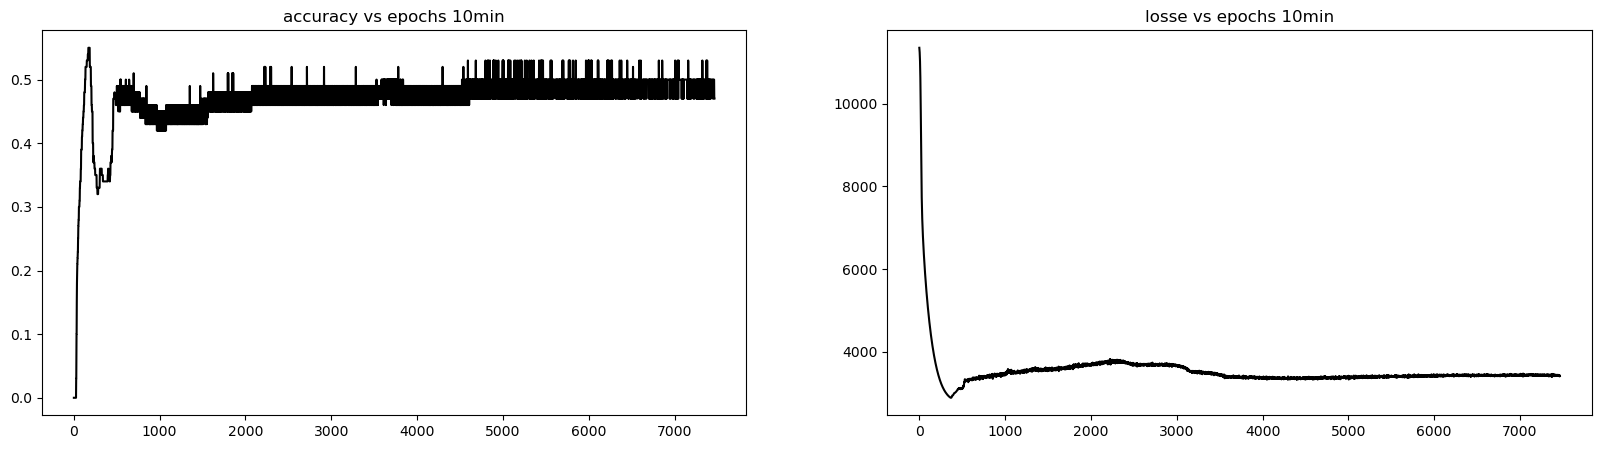

In [9]:
defultePlotSize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [20, 5]
plt.subplot(1, 2, 1)
plt.title('accuracy vs epochs 10min')
plt.plot(list(range(len(accs[:]))), accs[:], '-', color='black', )
plt.subplot(1, 2, 2)
plt.title('losse vs epochs 10min')
plt.plot(list(range(len(losses)))[:], losses[:], '-', color='black')
plt.rcParams['figure.figsize'] = defultePlotSize
epochs*len(validDataset)

In [ ]:
title = "trying varied movie length"
dt_string = datetime.now().strftime("%d.%m.%Y_%H-%M-%S-%f")
modelPath = f"./Models/{title.replace(' ', '_')}_{dt_string}.pt"
torch.save(model.state_dict(),modelPath)
print(f"saved to {modelPath}")

saved to ./Models/trying_varied_movie_length_06.06.2023_20-57-22-925357.pt


In [ ]:
return_dict = {}
for length in range(10, 60, 10):
    data = expermentDataloader(
        f"{folder}/index.csv",
        f"{folder}", 
        length=oneMinInFPS*length
    )
    rawData = [d for d in data]
    featIn = len(rawData[0][0])
    featIn = len(rawData[0][0])
    trainValidData = []
    testData = []
    addData(testData, trainValidData, rawData, rhsSize=300)


    np.random.shuffle(trainValidData)
    trainData = []
    validData = []
    addData(trainData, validData, trainValidData, rhsSize=int(len(trainValidData)*(1/3)))

    trainDataset = DataLoader(trainData, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True) 
    validDataset = DataLoader(validData, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
    testDataset = DataLoader(testData, batch_size=len(testData), shuffle=True, num_workers=num_workers, pin_memory=True)

    train(trainData=trainDataset, validData=validDataset, name=f"{length}", featIn=featIn, return_dict=return_dict, epochs=25000, device=device, printStatus=True, capacity=1200)

training 10 on cuda:1...
training 20 on cuda:1...5000	           Train Loss:6.7009 Valid Loss:4842.8022	           Train accuracy:1.0000 Valid accuracy:0.3400           
training 30 on cuda:1...5000	           Train Loss:5.1718 Valid Loss:6200.8335	           Train accuracy:1.0000 Valid accuracy:0.0800           
training 40 on cuda:1...5000	           Train Loss:5.7519 Valid Loss:7389.6821	           Train accuracy:1.0000 Valid accuracy:0.0200           
training 50 on cuda:1...5000	           Train Loss:6.7911 Valid Loss:7166.8022	           Train accuracy:1.0000 Valid accuracy:0.0000           


<pre>
training 10 on cuda:1...5000	           Train Loss:6.5410 Valid Loss:2969.7488	           Train accuracy:1.0000 Valid accuracy:0.4600
training 20 on cuda:1...5000	           Train Loss:7.4455 Valid Loss:6505.9922	           Train accuracy:1.0000 Valid accuracy:0.0800         
training 30 on cuda:1...5000	           Train Loss:8.3460 Valid Loss:6982.2554	           Train accuracy:1.0000 Valid accuracy:0.0100       
training 40 on cuda:1...         
          epoch: 11603/25000	           Train Loss:9.9520 Valid Loss:5950.2725	           Train accuracy:1.0000 Valid accuracy:0.0000
</pre>

In [ ]:
return_dict

{'10': {'path': './Models/smallTrain/10.pt', 'acc': 0.34},
 '20': {'path': './Models/smallTrain/20.pt', 'acc': 0.08},
 '30': {'path': './Models/smallTrain/30.pt', 'acc': 0.02},
 '40': {'path': './Models/smallTrain/40.pt', 'acc': 0.0},
 '50': {'path': './Models/smallTrain/50.pt', 'acc': 0.0}}